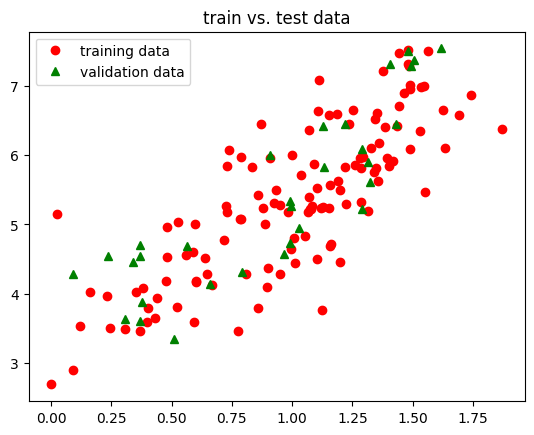

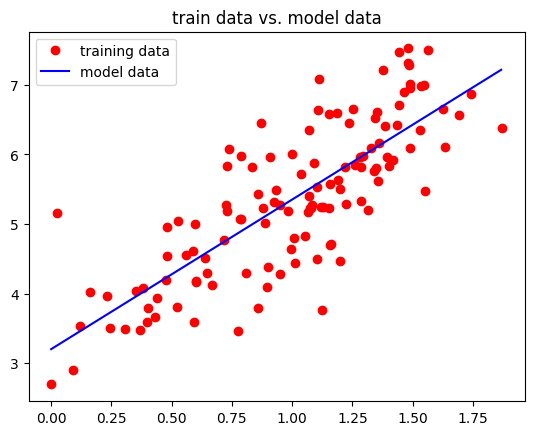

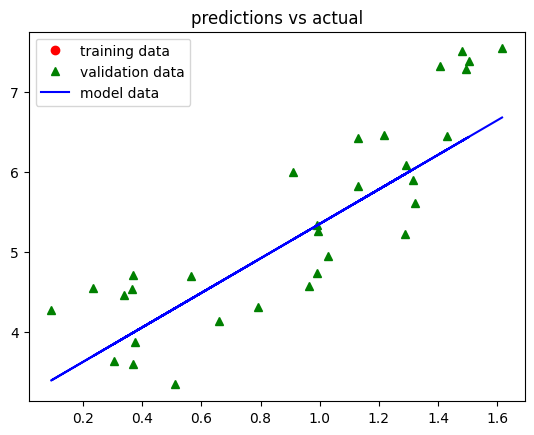

prediction error (manual): 0.4142120438505252
prediction error (tool): 0.41421204385052524


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics

def load_data(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df

def handle_missing_data(df: pd.DataFrame):
    '''
        Handles the missing data by replacing with the default null value.
        
        @param df: A pandas DataFrame containing the read data.
    '''
    df.fillna(value=0, inplace=True)

def load_features(df: pd.DataFrame, feature_input: str, feature_output: str) -> tuple:
    '''
        Extracts the feature values of input and output from a data frame.
        
        @param df: A pandas DataFrame containing some studied features.
        @param feature_input: The feature that we study the output on.
        @param feature_output: The feature that is studied.
    '''
    handle_missing_data(df)
    return df[feature_input].tolist(), df[feature_output].tolist()
    
def split_data(inputs: list) -> tuple:
    '''
        Splits the passed data in training and validation sample 80%/20%.
        
        @param inputs: Input data.
    '''
    
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    train_sample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    validation_sample = [i for i in indexes if not i in train_sample]
    
    return train_sample, validation_sample
    
def plot_data(x1: list, y1: list, x2: list, y2: list, x3: list, y3: list, title: str):
    plt.plot(x1, y1, 'ro', label='training data')
    if x2:
        plt.plot(x2, y2, 'g^', label='validation data')
    if x3:
        plt.plot(x3, y3, 'b-', label='model data')
        
    plt.title(title)
    plt.legend()
    plt.show()

def training(regressor: linear_model.LinearRegression, t_in: list, t_out: list) -> tuple:
    xx = [[el] for el in t_in]
    
    regressor.fit(xx, t_out)
    
    w0, w1 = regressor.intercept_, regressor.coef_
    
    return w0, w1

def predict(regressor: linear_model.LinearRegression, v_in: list) -> list:
    return regressor.predict([[x] for x in v_in])

def main():
    df1 = load_data("data/v1_world-happiness-report-2017.csv")
    #df2 = load_data("data/v2_world-happiness-report-2017.csv")
    #df3 = load_data("data/v3_world-happiness-report-2017.csv")
        
    inputs, outputs = load_features(df1, 'Economy..GDP.per.Capita.', 'Happiness.Score')
    
    train, validation = split_data(inputs)
    
    train_inputs = [inputs[i] for i in train]
    train_outputs = [outputs[i] for i in train]
    validation_inputs = [inputs[i] for i in validation]
    validation_outputs = [outputs[i] for i in validation]
    
    plot_data(train_inputs, train_outputs, validation_inputs, validation_outputs, [], [], title='train vs. test data')
    
    regressor = linear_model.LinearRegression()
    w0, w1 = training(regressor, train_inputs, train_outputs)
    
    noOfPoints = 1000
    xref = []
    val = min(train_inputs)
    step = (max(train_inputs) - min(train_inputs)) / noOfPoints
    for _ in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref]
    
    plot_data(train_inputs, train_outputs, [], [], xref, yref, 'train data vs. model data')
    
    predictions = predict(regressor, validation_inputs)
    plot_data([], [], validation_inputs, validation_outputs, validation_inputs, predictions, 'predictions vs actual')
    
    error = 0.0
    for t1, t2 in zip(predictions, validation_outputs):
        error += (t1 - t2)**2
    error = error / len(validation_outputs)

    print(f"prediction error (manual): {error}")
    print(f"prediction error (tool): {metrics.mean_squared_error(validation_outputs, predictions)}")

main()